In [314]:
#important libraries for handling and processing data
import numpy as np
import pandas as pd
import tensorflow as tf
import finnhub
import time

In [372]:
sandboxKey = 'sandbox_c3puea2ad3i8q4a54ft0'
regularKey = 'c3puea2ad3i8q4a54fsg'
finnhub_client = finnhub.Client(api_key=regularKey)

In [474]:
dt = datetime(2000,1,1)
timestamp = int((dt - datetime(1970, 1, 1)).total_seconds())
print(timestamp)
#1577868780
r = finnhub_client.technical_indicator(symbol="TSLA", resolution='D', _from=timestamp, to=1629709073, indicator='rsi', indicator_fields={"timeperiod": 6})
t = finnhub_client.technical_indicator(symbol="TSLA", resolution='D', _from=timestamp, to=1629709073, indicator='sma', indicator_fields={"timeperiod": 40})

946684800


In [475]:
df = pd.DataFrame(r["t"])
df["c"] = r["c"]
df['sma'] = t['sma']
df["rsi"] = r["rsi"]

In [476]:
#Trading Backtest
    #practice trading on differnet stocks before introducing a stock screener
    #10 day rsi
    #200 day simple moving average
    #trade if price > 200 day SMA
        #If RSI falls below 30 then buy
            #buy 100 of the stock in whole
        #for held stock (hold one position for now)
            #sell if 10 days have passed OR
            #RSI has moved above 40

In [477]:
#include a graph for that portfolio xx
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

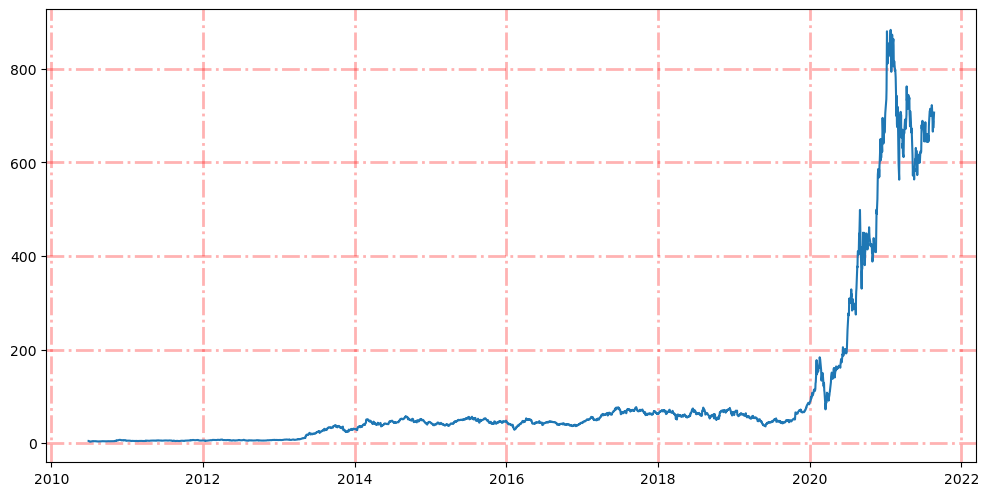

In [478]:
df['time'] = 0
df['time'] = pd.to_datetime(df[0],unit='s')
x = df['time']
y = df["c"]
fig = plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.grid(b=True, color='r', alpha=0.3, linestyle='-.', linewidth=2)
plt.plot(x,y, label = 'Price')

In [479]:
def backtest(dataFrame):
    boughtPrice = 0
    sellingPrice = 0
    profit = 0
    bought = 0
    noOfPeriods = 0
    for index, row in dataFrame.iterrows():
        #wait for entry condition, back track 50 more days
        if row['sma'] == 0 or row['rsi'] == 0:
            continue
        else:
            if bought == 1:
                #write in the selling conditions
                if count > 10:
                    sellingPrice = row['c']
                    profit = profit + (sellingPrice*10 - boughtPrice)
                    bought = 0
                    print("TRADE: " + str(sellingPrice*10 - boughtPrice))
                if row['rsi'] >= 40:
                    sellingPrice = row['c']
                    profit = profit + (sellingPrice*10 - boughtPrice)
                    print("TRADE: " + str(sellingPrice*10 - boughtPrice))
                    bought = 0
                count = count + 1
            else:
                if row["c"] > row['sma']:
                    if row['rsi'] <= 30:
                        boughtPrice = row['c']*10
                        bought = 1
                        count = 0
    return(profit)

In [480]:
profitT = backtest(df)
print("PROFIT: " + str(profitT))
startingVal = df.at[0,'c']*10
print("START: " + str(startingVal))
print("profit percentage: " + str(profitT*100/startingVal))

TRADE: 4.559999999999995
TRADE: -6.399999999999977
TRADE: 15.259999999999991
TRADE: -72.19999999999993
TRADE: 13.900000000000034
TRADE: 129.23999999999978
TRADE: 360.7399999999993
PROFIT: 445.0999999999992
START: 47.78
profit percentage: 931.5613227291736


In [394]:
#Shown above are some performance metrics on this trading strategy for APPLE for the last 20 years

In [429]:
import requests

In [443]:
response = requests.get(f'https://finnhub.io/api/v1/stock/symbol?exchange=US&mic=XNYS&token={sandboxKey}')
frame = response.json()
print(response)

<Response [200]>


In [465]:
len(frame)
counter = 0
dfSymbols = pd.DataFrame(np.zeros(len(frame)), columns = ['start'])
for index, row in dfSymbols.iterrows():
    len(frame[counter]['symbol'])
    counter = counter + 1

In [466]:
dfSymbols

,start
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
3614,0.0
3615,0.0
3616,0.0
3617,0.0
